## Question 1

[1] A factory wants to maximize the amount of product made per​ day, with constraints such as delivery​ capacity, worker​ hours, and material storage space.



[2] A fast food chain wants to minimize​ payroll, with constraints such as minimum number of​ cashiers, minimum number of​ cooks, and hours of operation.

## QUESTION 2


a. Each serving of chili should contain a​ quarter-pound of beef. Choose the correct classification.

#### Requirement

---
b. Customer demand for a cereal is not expected to exceed 800 boxes during the month. Choose the correct classification.

#### Bound
---
c. The amount of cash available to invest in March is equal to the accounts receivable in February plus investment yields due on February 28. Choose the correct classification.


#### Balance constraint
---

d. A can of premium nuts should have at least twice as many cashews as peanuts. Choose the correct classification.

#### Proportional relationship
---
e. A warehouse has​ 3,500 units available to ship to customers. Choose the correct classification.


#### Limitation
---
f. A call center needs at least 15 service representatives on Monday morning.​ (Assume that this refers to a single​ variable.) Choose the correct classification.

#### Bound
---
g. An ice cream manufacturer has 40 dozen fresh eggs at the start of the production shift. Choose the correct classification.
Limitation

#### Limitation

## QUESTION 3


a. Identify the decision​ variables, objective​ function, and constraints in simple verbal expressions.
Identify the decision variables. Select all that apply.

### ANSWER
[1] The number of LaserStop radar detectors to produce

[2] The number of SpeedBuster radar detectors to produce

---


B. Identify the objective function in a simple verbal expression. Choose the correct answer.

### ANSWER
A.Maximize profit

---

C. Identify the constraints in simple verbal expressions. Select all that apply.

### ANSWER
[1] The number of LaserStop and SpeedBuster radar detectors to produce cannot be negative.


[2] The supply of component B used must be less than or equal to 3 comma 500.

[3] The supply of component A used must be less than or equal to 4 comma 200.


| Components Required/Unit | A  | B  | Profit/Unit |
|--------------------------|----|----|-------------|
| LaserStop                | 20 | 5  | 122         |
| SpeedBuster              | 12 | 9  | 133         | 



### Maximize Profit
 P = 122L + 133S 

#### Subject to the Constraints:
1.  20L + 5S ≤ 4200 
2.  12L + 9S ≤ 3500 
3.  L ≥ 0 
4.  S ≥ 0 


## QUESTION 4

a. Identify the decision​ variables, objective​ function, and constraints in simple verbal expressions.
Identify the decision variables. Select all that apply.

#### ANSWER

[1] The number of Adirondack chairs to produce

[2] The number of sling chairs to produce

[3] The number of hammocks to produce


b. Identify the objective function in a simple verbal expression. Choose the correct answer.


#### answer

Maximize profit 


C. Identify the constraints in simple verbal expressions. Select all that apply.

#### answer


[1] The number of sling​ chairs, Adirondack​ chairs, and hammocks to produce cannot be negative.

[2] The total hours spent​ cutting, assembling, and finishing must be less than or equal to 100 per month.

[3] The hours spent assembling must be less than or equal to 50 per month.

[4] The hours spent cutting must be less than or equal to 50 per month.

[5] The hours spent cutting must be less than or equal to 50 per month.



D. 



## Question 5

In [1]:
# Import the necessary library
from pulp import LpProblem, LpVariable, LpMaximize, lpSum, LpStatus, value

# Create the linear programming problem
problem = LpProblem("ColPal_Advertising_Allocation", LpMaximize)

# Decision Variables
R = LpVariable("Radio", lowBound=0)  # Minutes for Radio
T = LpVariable("TV", lowBound=0)     # Minutes for TV

# Objective Function: Maximize Exposure
problem += 400 * R + 800 * T, "Total Exposure"

# Constraints
problem += 450 * R + 1900 * T <= 20000, "Budget Constraint"
problem += 3 * R <= T, "Time Allocation Constraint"  # At least 75% time to TV

# Solve the problem
problem.solve()

# Output the results
print("Optimal Solution:")
print(f"Minutes allocated to Radio: {R.varValue:.2f}")
print(f"Minutes allocated to TV: {T.varValue:.2f}")
print(f"Maximum possible exposure: {value(problem.objective):.2f}")

# Check the status of the constraints
budget_constraint = 800 * R.varValue + 1900 * T.varValue
time_allocation_constraint = 3 * R.varValue

print(f"\nBudget used: {budget_constraint:.2f} out of $25,000")
print(f"Time Allocation used (TV must be >= 3 * Radio): {time_allocation_constraint:.2f}")
print(f"Budget is a {'binding' if budget_constraint >= 30000 else 'non-binding'} constraint and it has {0 if budget_constraint == 20000 else 20000 - budget_constraint:.2f} slack.")
print(f"Time Allocation is a {'binding' if time_allocation_constraint >= T.varValue else 'non-binding'} constraint and it has {0 if time_allocation_constraint == T.varValue else T.varValue - time_allocation_constraint:.2f} slack.")


Optimal Solution:
Minutes allocated to Radio: 3.25
Minutes allocated to TV: 9.76
Maximum possible exposure: 9105.69

Budget used: 21138.21 out of $25,000
Time Allocation used (TV must be >= 3 * Radio): 9.76
Budget is a non-binding constraint and it has -1138.21 slack.
Time Allocation is a non-binding constraint and it has 0.00 slack.


## QUESTION 6

The optimal solution is to produce 0.00 LaserStop models and 333.33 
SpeedBuster models, which gives the maximum value of the objective function, 45666.67.
Vertices of the feasible region:
(-229.51, 696.72)
(0, 0)
(0, 333.33)
(0, 500.0)
(210.53, 0)
(583.33, 0)


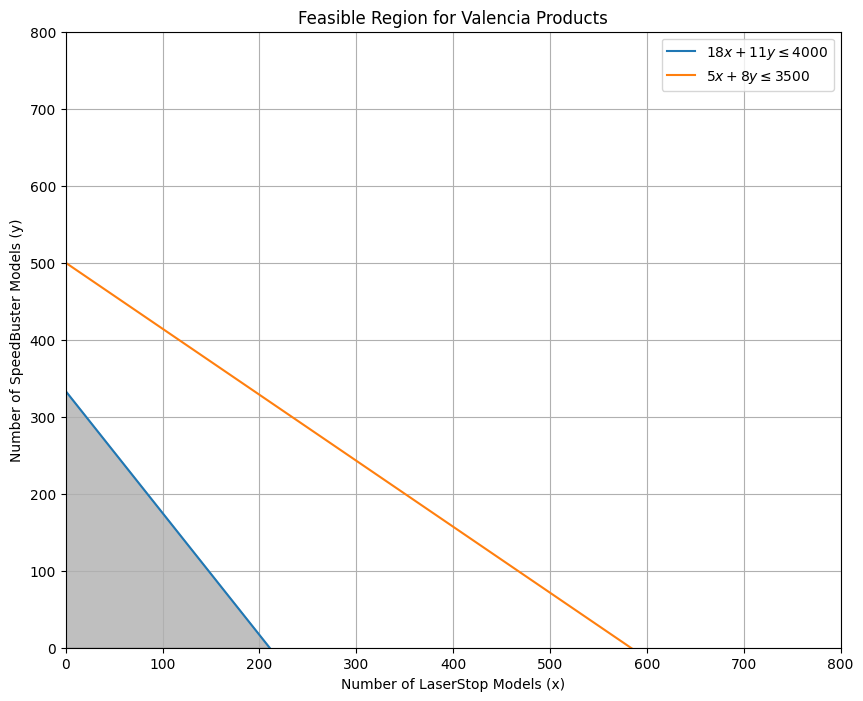

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from sympy import symbols, Eq, solve

# Define global variables for the problem
# Objective function coefficients
profit_coeffs = (125, 137)  # Profit per LaserStop and SpeedBuster model

# Constraint coefficients
constraint_coeffs = {
    'A': (19, 12),  # Coefficients for the first constraint
    'B': (6, 7)     # Coefficients for the second constraint
}

# Right-hand side values for constraints
b_values = {
    'A': 4000,  # RHS for the first constraint
    'B': 3500   # RHS for the second constraint
}

graph_x = 800
graph_y = 800
# Define the coefficients of the objective function (we are minimizing, so we use negative)
c = [-profit_coeffs[0], -profit_coeffs[1]]

# Define the coefficients for the inequality constraints
A = [constraint_coeffs['A'], constraint_coeffs['B']]
b = [b_values['A'], b_values['B']]

# Bounds for each variable (x and y must be >= 0)
x_bounds = (0, None)
y_bounds = (0, None)

# Solve the linear programming problem
res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

# Extract optimal solution values
optimal_laserstop = res.x[0]  # Optimal number of LaserStop models
optimal_speedbuster = res.x[1]  # Optimal number of SpeedBuster models
optimal_value = -res.fun  # Optimal value of the objective function (maximized)

# Print the results
print(f"The optimal solution is to produce {optimal_laserstop:.2f} LaserStop models and {optimal_speedbuster:.2f} \nSpeedBuster models, which gives the maximum value of the objective function, {optimal_value:.2f}.")

# Calculate the vertices of the feasible region
# Intersections
# Line 1 with y = 0
x1 = b_values['A'] / constraint_coeffs['A'][0]
y1 = 0

# Line 1 with x = 0
x2 = 0
y2 = b_values['A'] / constraint_coeffs['A'][1]

# Line 2 with y = 0
x3 = b_values['B'] / constraint_coeffs['B'][0]
y3 = 0

# Line 2 with x = 0
x4 = 0
y4 = b_values['B'] / constraint_coeffs['B'][1]

# Intersection of the two lines
x, y = symbols('x y')
eq1 = Eq(constraint_coeffs['A'][0] * x + constraint_coeffs['A'][1] * y, b_values['A'])
eq2 = Eq(constraint_coeffs['B'][0] * x + constraint_coeffs['B'][1] * y, b_values['B'])
intersection = solve((eq1, eq2), (x, y))

# Display vertices
vertices = [(0, 0), (x1, y1), (x2, y2), (x3, y3), (x4, y4), (intersection[x], intersection[y])]
vertices = [(round(v[0], 2), round(v[1], 2)) for v in vertices]  # Round to two decimal places
unique_vertices = set(vertices)  # Get unique points

# Print the correct vertices of the feasible region
print("Vertices of the feasible region:")
for v in sorted(unique_vertices):
    print(v)

# Now plot the feasible region
x = np.linspace(0, graph_x, graph_y)
y1 = (b_values['A'] - constraint_coeffs['A'][0] * x) / constraint_coeffs['A'][1]  # From constraint A
y2 = (b_values['B'] - constraint_coeffs['B'][0] * x) / constraint_coeffs['B'][1]  # From constraint B

plt.figure(figsize=(10, 8))
plt.plot(x, y1, label=r'$18x + 11y \leq 4000$')
plt.plot(x, y2, label=r'$5x + 8y \leq 3500$')
plt.xlim((0, graph_x))
plt.ylim((0, graph_y))
plt.fill_between(x, 0, np.minimum(y1, y2), where=(np.minimum(y1, y2) > 0), color='grey', alpha=0.5)

# Adding labels and title
plt.title('Feasible Region for Valencia Products')
plt.xlabel('Number of LaserStop Models (x)')
plt.ylabel('Number of SpeedBuster Models (y)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()


## QUESTION 7


Maximize Profit = 124L + 139S

                  18L + 11S < 4000

                  6L + 8S < 3500
                  
                  L > 0 and S > 0

a. Modify the data in the model to create a problem with alternative optimal solutions. Choose the correct model below.

## ANSWER


Maximize Profit = 139L + 139s

                   11L + 11S < 3000

                   8L  + 8S < 2500

                   L > 0 and S > 0
---

b. Modify the data in the model to create a problem with an unbounded solution. Choose the correct model below.

Maximize Profit = 126L + 139s

                   19L + 11S < 3000

                   5L  + 8S < 2500

                   L > 0 and S > 0
---

c. Modify the data in the model to create a problem with infeasibility. Choose the correct model below.

Maximize Profit = 126L + 139s

                   19L + 11S < 3000

                   5L  + 8S < 3000

                   L > 0 and S > 0





## QUESTION 8


Type of Ad	Exposure/Minute	Cost/Minute

Radio	350	400

TV	810	1,600



a. Modify the data in the model to create a problem with alternative optimal solutions. Choose the correct model.

#### ANSWER

Maximize = 350R + 810T

---

b. Modify the data in the model to create a problem with an unbounded solution. Modify the condition 400 Rplus1 comma 600 Tless than or equals26 comma 000 to create the unbounded solution. Choose the correct model.


#### ANSWER

---

400R + 1600T Greater than and equal 2600


c. Modify the data in the model to create a problem with infeasibility. Add an additional constraint that would create a problem with infeasibility. Choose the correct model.


#### Answer

R Greater than and equal  18


### QUESTION 9



In [1]:
# Python code to calculate the return-to-price ratio for three stocks and determine the best investment option

# Define global variables for stock prices and returns
price_A = 11
return_A = 8

price_B = 16
return_B = 6

price_C = 35
return_C = 12

def calculate_ratios():
    # Calculate ratios (Return/Price) for each stock
    ratio_A = return_A / price_A
    ratio_B = return_B / price_B
    ratio_C = return_C / price_C
    
    return round(ratio_A,2), round(ratio_B,2), round(ratio_C,2)

def find_best_investment():
    # Calculate the ratios
    ratio_A, ratio_B, ratio_C = calculate_ratios()
    
    # Store ratios in a dictionary
    ratios = {
        'Stock A': ratio_A,
        'Stock B': ratio_B,
        'Stock C': ratio_C
    }
    
    # Find the stock with the highest ratio
    best_investment = max(ratios, key=ratios.get)
    
    return best_investment, ratios

# Execute the function to find the best investment
best_stock, stock_ratios = find_best_investment()

print("Objective, return/share, constraint, Price/share")

# Display the results
best_stock, stock_ratios


Objective, return/share, constraint, Price/share


('Stock A', {'Stock A': 0.73, 'Stock B': 0.38, 'Stock C': 0.34})

## Part B


In [2]:
# Python code to calculate the number of shares to buy and total return based on available funds

# Define global variables for stock prices, returns, and available funds

available_funds = 2500

def calculate_shares_and_return():
    # Calculate the number of shares of Stock A to buy
    shares_A = available_funds / price_A
    # No shares of B or C since Stock A has the best return-to-price ratio
    shares_B = 0
    shares_C = 0

    # Calculate the total return for Stock A
    total_return = shares_A * return_A

    return shares_A, shares_B, shares_C, total_return

# Execute the function to find the optimal number of shares and total return
shares_A, shares_B, shares_C, total_return = calculate_shares_and_return()

# Display the results
print("Highest,  Approximately the same as")
round(shares_A,2), shares_B, shares_C, round(total_return,2)


Highest,  Approximately the same as


(227.27, 0, 0, 1818.18)

## QUESTION 10

a. Develop a mathematical model that will yield a valid set of weights to maximize the​ student's score for the course. Let​ M, F,​ A, and P represent the weights for the​ midterm, final​ exam, individual​ assignments, and​ participation, respectively.


#### ANSWER

maximumm score = 0.93M + 0.84 + 0.92A + 0.86P

                P  ≤ 0.015

                M - 2A ≥ 0

                F - 3A ≥ 0

                M ≥ 0.25

                F ≥ 0.25

                A ≥ 0.1

                P ≥ 0.1 

                M + F + A + P = 1.0

                M,F,A,P ≥ 0
---



In [6]:
from scipy.optimize import linprog

# Define global variables for the scores earned in each component
midterm_score = 92
final_score = 84
assignment_score = 92
participation_score = 87

# Global bounds for the weights of each component
M_bounds = (0.25, None)  # Midterm at least 25%
F_bounds = (0.25, None)  # Final at least 25%
A_bounds = (0.10, None)  # Assignment at least 10%
P_bounds = (0.10, 0.15)  # Participation between 10% and 15%

# Coefficients for the objective function (maximize score)
# We negate the values for linprog since it minimizes by default
c = [-midterm_score, -final_score, -assignment_score, -participation_score]

# Constraints
A_ub = [
    [1, 0, -2, 0],  # M >= 2A --> -M + 2A <= 0
    [0, 1, -3, 0],  # F >= 3A --> -F + 3A <= 0
]
b_ub = [0, 0]

# Equality constraint: M + F + A + P = 1
A_eq = [[1, 1, 1, 1]]
b_eq = [1]

# Boundaries for variables (weights of M, F, A, P)
bounds = [M_bounds, F_bounds, A_bounds, P_bounds]

# Solve the linear optimization problem
result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# Check if the solution was successful
if result.success:
    M, F, A, P = result.x
    optimal_score = -(result.fun)  # Negate to get the maximized score
else:
    M, F, A, P = None, None, None, None
    optimal_score = None

# Print the results with each value on its own line, rounded to 3 decimal places
print(f"M (Midterm weight) = {M:.3f}")
print(f"F (Final weight) = {F:.3f}")
print(f"A (Assignment weight) = {A:.3f}")
print(f"P (Participation weight) = {P:.3f}")
print(f"Optimal weighted score = {optimal_score:.3f}")



M (Midterm weight) = 0.250
F (Final weight) = 0.250
A (Assignment weight) = 0.400
P (Participation weight) = 0.100
Optimal weighted score = 89.500


0.500

0.300

0.100

0.100


0.928

## QUESTION 11

In [30]:
from scipy.optimize import linprog
import numpy as np

# Shipping costs from each distribution center (rows) to each retail location (columns)
costs = np.array([
    [2.15, 2.10, 1.75, 1.50, 1.20, 0.65, 0.90, 0.80, 0.35, 0.15, 0.60, 0.50],  # Atlanta
    [1.95, 2.00, 1.70, 1.53, 1.10, 0.55, 0.60, 1.05, 0.60, 0.50, 0.25, 0.30],  # Lexington
    [1.70, 1.85, 1.50, 1.41, 0.95, 0.40, 0.40, 0.95, 0.70, 0.70, 0.35, 0.40],  # Milwaukee
    [0.60, 0.55, 0.35, 0.60, 0.40, 0.95, 1.00, 1.10, 1.35, 1.60, 1.60, 1.70]   # Salt Lake City
])

# Supply available at each distribution center
supply = np.array([39500, 35000, 14800, 15000])

# Demand at each retail location
demand = np.array([5000, 15000, 4200, 3700, 4300, 8000, 3000, 8500, 3300, 12000, 9000, 16000])

# Flatten the costs matrix for use in the linprog function
c = costs.flatten()

# Number of distribution centers and retail locations
num_distribution_centers = len(supply)
num_retail_locations = len(demand)

# Create the constraints for supply (each distribution center's total shipped amount should not exceed supply)
A_supply = np.zeros((num_distribution_centers, num_distribution_centers * num_retail_locations))
for i in range(num_distribution_centers):
    A_supply[i, i * num_retail_locations: (i + 1) * num_retail_locations] = 1

b_supply = supply

# Create the constraints for demand (each retail location's total received amount should meet the demand)
A_demand = np.zeros((num_retail_locations, num_distribution_centers * num_retail_locations))
for j in range(num_retail_locations):
    A_demand[j, j::num_retail_locations] = 1

b_demand = demand

# Stack the supply and demand constraints together
A_eq = np.vstack([A_supply, A_demand])
b_eq = np.hstack([b_supply, b_demand])

# Define bounds for the decision variables (non-negative amounts to be shipped)
bounds = [(0, None) for _ in range(num_distribution_centers * num_retail_locations)]

# Solve the linear programming problem
result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# Extract the results and reshape the solution back to a matrix form
shipment_plan = result.x.reshape((num_distribution_centers, num_retail_locations))

# Total minimum cost
total_cost = result.fun

# Check which distribution centers are operating at capacity (i.e., fully using their supply)
distribution_capacity = np.sum(shipment_plan, axis=1)

# Output the results
print("Total Minimum Shipping Cost: $", total_cost)
print("\nDistribution centers operating at capacity:")
if np.isclose(distribution_capacity[0], supply[0]):
    print("Atlanta")
if np.isclose(distribution_capacity[1], supply[1]):
    print("Lexington")
if np.isclose(distribution_capacity[2], supply[2]):
    print("Milwaukee")
if np.isclose(distribution_capacity[3], supply[3]):
    print("Salt Lake City")
if not any(np.isclose(distribution_capacity, supply)):
    print("None of the above")


AttributeError: 'NoneType' object has no attribute 'reshape'

In [1]:
from scipy.optimize import linprog

# Coefficients of the objective function (profit for each product)
c = [-0.24, -0.19, -0.23, -0.20, -0.15]  # Negative for maximization

# Coefficients of the constraints
A = [
    [0.5, 0.25, 0.5, 0.25, 0.3125],  # Wax constraint
    [0.24, 0.12, 0.24, 0.12, 0.15],  # Fragrance constraint
    [0.43, 0.22, 0.58, 0.33, 0.8],   # Wick constraint
    [0.48, 0.24, 0.23, 0.23, 0.26],  # Display constraint
    [-0.48, 0, -0.23, 0, 0],         # Large jars + pillars >= 2 feet
    [0, 0, 0, 0, -0.26],             # Votive packs >= 1 foot
    [1, 1, -1, -1, 0]                # At least as many jars as pillars
]

# Right-hand side of the constraints
b = [
    200000,  # Wax limit
    75000,   # Fragrance limit
    225000,  # Wick limit
    8,       # Display size limit
    2,       # Large jars + pillars
    1,       # Votive packs
    0        # At least as many jars as pillars
]

# Bounds for each variable (all variables must be >= 0)
x_bounds = (0, None)

# Solve the linear program
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds]*5, method='highs')

# Output the result
if result.success:
    print("Optimal number of candles to make:")
    print(f"Large Jar: {round(result.x[0])}")
    print(f"Small Jar: {round(result.x[1])}")
    print(f"Large Pillar: {round(result.x[2])}")
    print(f"Small Pillar: {round(result.x[3])}")
    print(f"Votive Pack: {round(result.x[4])}")
    print(f"Total Profit: ${-result.fun:.2f}")
else:
    print("Optimization was not successful")


Optimal number of candles to make:
Large Jar: 0
Small Jar: 0
Large Pillar: 35
Small Pillar: 0
Votive Pack: 0
Total Profit: $8.00
